## **Home Loan Project**

The home loan industry plays a pivotal role in the financial services sector, enabling individuals and families to secure funding for property purchases. The Home Loan dataset contains information on potential applicants, such as income, employment status, credit history and property details.


This aim of this project is to understand the relationships in the data set through data cleaning, visualization, and statistical analysis. The investigation will influence our decisions on loan approvals and help with risk assessment.

### **Data Collection and Preparation**

In [2]:
# Import Libraries
import pandas as pd
import seaborn as sns

# Load Data
data_url = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"

home_loan = pd.read_csv(data_url)

home_loan.head()

df = home_loan.copy()

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Data Ingestion**

In [3]:
loan_data = pd.DataFrame(df)
loan_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Data Inspection**

In [4]:
# Columns/Features of our Data
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# Check the number of columns and rows
loan_data.shape

(614, 13)

In [6]:
# Check for missing data
loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### **Handling Missing Values**

In [7]:
# Seeing as we have a large number of missing data in credit history, self employed and loan amount columns, let us gauge the percentage of missingness in the whole data

round((loan_data.isna().sum() / len(loan_data)) * 100, 2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

**Since we have > 5% missingness in self_employed and credit history, we need to check if they are important columns in pre-processing our data. Seeing as employability and credit history are important factors in predicting if loans will be repaid, we need to handle it without dropping those columns**

In [8]:
# We can fill missing values using imputation based on our measure of center (mean, median and mode)

# Self_employed is Categorical/Classical, we can use Mode

loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)

loan_data.isna().sum()


C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_18068\3931744312.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# For Credit History, since it is represented in Binary, we can also use mode.

loan_data['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [ ]:
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0])

loan_data.isna().sum()

C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_18068\86726534.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
# For loan amount, since it is numerical, we need to check for outliers first to know if we can use the mean or median to fill the data
def get_outliers(dataset):
  Q1 = dataset.quantile(0.25)

  Q3 = dataset.quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - (1.5 * IQR)
  higher_bound = Q3 + (1.5 * IQR)

  outliers = loan_data[(dataset < lower_bound) | (dataset > higher_bound)]

  return outliers

get_outliers(loan_data['LoanAmount'])
len(get_outliers(loan_data['LoanAmount']))


41

<Axes: ylabel='LoanAmount'>

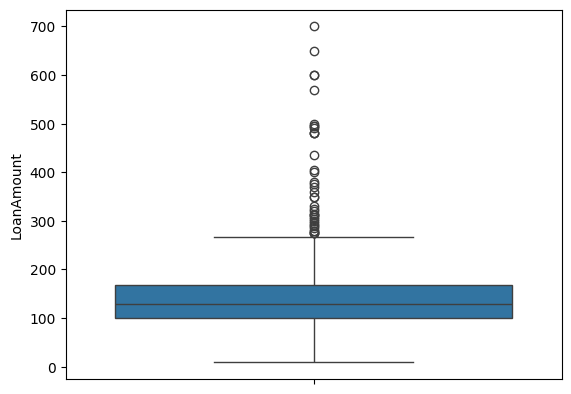

In [12]:
# Using visual representation
sns.boxplot(loan_data['LoanAmount'])

In [ ]:
# Seeing as we have a lot of outliers in the LoanAmount column, we are going to use the median to replace the LoanAmount with the median
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median())
loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
# Since Gender is boolean/binary, we can also use mode to fill missing data
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
loan_data.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
get_outliers(loan_data['Loan_Amount_Term'])
len(get_outliers(loan_data['Loan_Amount_Term']))

88

<Axes: ylabel='Loan_Amount_Term'>

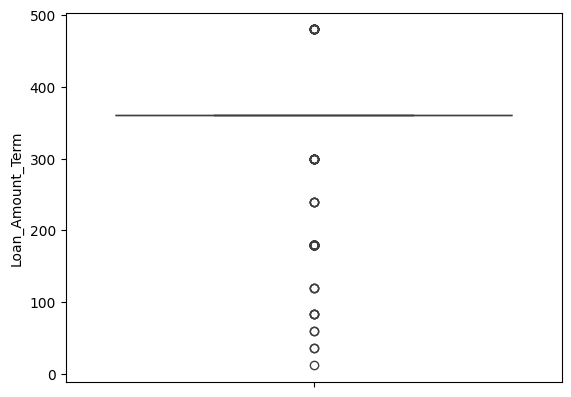

In [23]:
sns.boxplot(loan_data['Loan_Amount_Term'])

In [41]:
# Seeing as we have a lot of outliers in the LoanAmount column, we are going to use the median to replace the LoanAmount with the median
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].median())

loan_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [38]:
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
loan_data.isna().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
loan_data['Married'].fillna(loan_data['Married'].mode()[0])
loan_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [43]:
# Checking for duplicates
loan_data.duplicated().sum()

np.int64(0)

In [44]:
# Checking for data type inconsistencies...
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [47]:
# Convert ApplicantIncome from integer to float
loan_data['ApplicantIncome'] = loan_data['ApplicantIncome'].astype('float64')
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## **Exploratory Data Analysis (EDA)**

In [49]:
# Select Numerical Columns
num_features = loan_data.select_dtypes(include=['float64', 'int64']).columns
num_features

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')